# Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import stats 
from scipy.stats import pearsonr
from scipy.stats.stats import pearsonr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1.Exploring Data Analysis

In [2]:
#Reading csv file for salaries
salaries = pd.read_csv("salary.csv")
salaries.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
#dataframe shape
salaries.shape

(514, 11)

In [4]:
#Checking columns and missing values
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [5]:
cleaned_df=salaries.dropna(axis=0,inplace =True)
cleaned_df

In [6]:
#Data summary
salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,513.0,50863.220098,12685.132358,29000.00,40000.00,50096.00,60345.00,96156.00
exprior,513.0,2.931774,4.794327,0.00,0.00,1.00,4.00,25.00
yearsworked,513.0,12.836257,9.447040,0.00,4.00,12.00,22.00,41.00
yearsrank,513.0,7.046784,6.419708,0.00,2.00,5.00,12.00,28.00
market,513.0,0.948558,0.149524,0.71,0.84,0.92,1.02,1.33
degree,513.0,0.964912,0.184181,0.00,1.00,1.00,1.00,1.00
otherqual,513.0,0.044834,0.207142,0.00,0.00,0.00,0.00,1.00
position,513.0,2.130604,0.819977,1.00,1.00,2.00,3.00,3.00
male,513.0,0.750487,0.433153,0.00,1.00,1.00,1.00,1.00
Field,513.0,2.526316,1.126644,1.00,2.00,3.00,4.00,4.00


In [7]:
#Checking columns and their datatypes
salaries.columns.to_series().groupby(salaries.dtypes).groups

{dtype('int64'): Index(['exprior', 'yearsworked', 'yearsrank', 'degree', 'otherqual',
        'position', 'male', 'Field', 'yearsabs'],
       dtype='object'),
 dtype('float64'): Index(['salary', 'market'], dtype='object')}

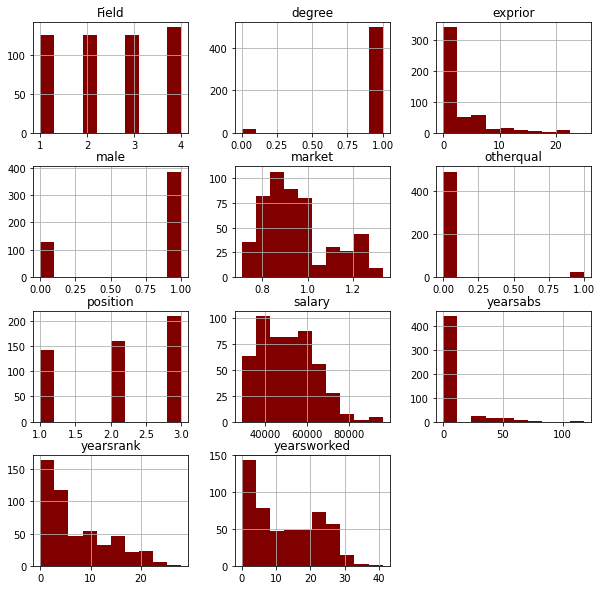

In [8]:
# Visualizing Histrograms
salaries.hist(figsize =(10, 10), color = "maroon");
_= plt.show()


•Many histograms are tail-heavy meaning several distributions are right-skewed (e.g.exprior,market,salary,yerasrank and yearsworked).

•Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

•Field has a normal distribution,looks like the mean and median are almost equal.

•While position,degree and male look like left-skewed distribution.

In [9]:
#Checking the relatioships 
salaries.corr()["salary"].sort_values(ascending = False)

salary         1.000000
position       0.702122
yearsworked    0.623589
yearsrank      0.610706
market         0.407214
male           0.361564
otherqual      0.167137
exprior        0.119989
degree         0.044554
yearsabs      -0.069630
Field         -0.499316
Name: salary, dtype: float64

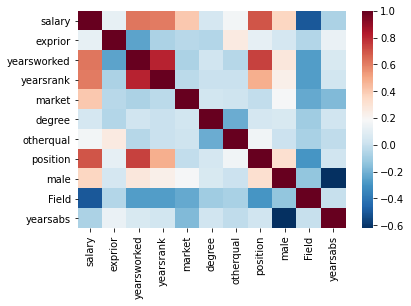

In [10]:
ax = sns.heatmap(salaries.corr(),cmap = "RdBu_r")


•Position has a positive strong relationship with salary.

•Yearworked and yearsrank have a moderate relationship with salary.

•While market has a weak positive relationship with salary.

•Lastly Field has a weak negative relatiuonship with salary.

<Figure size 2520x2520 with 0 Axes>

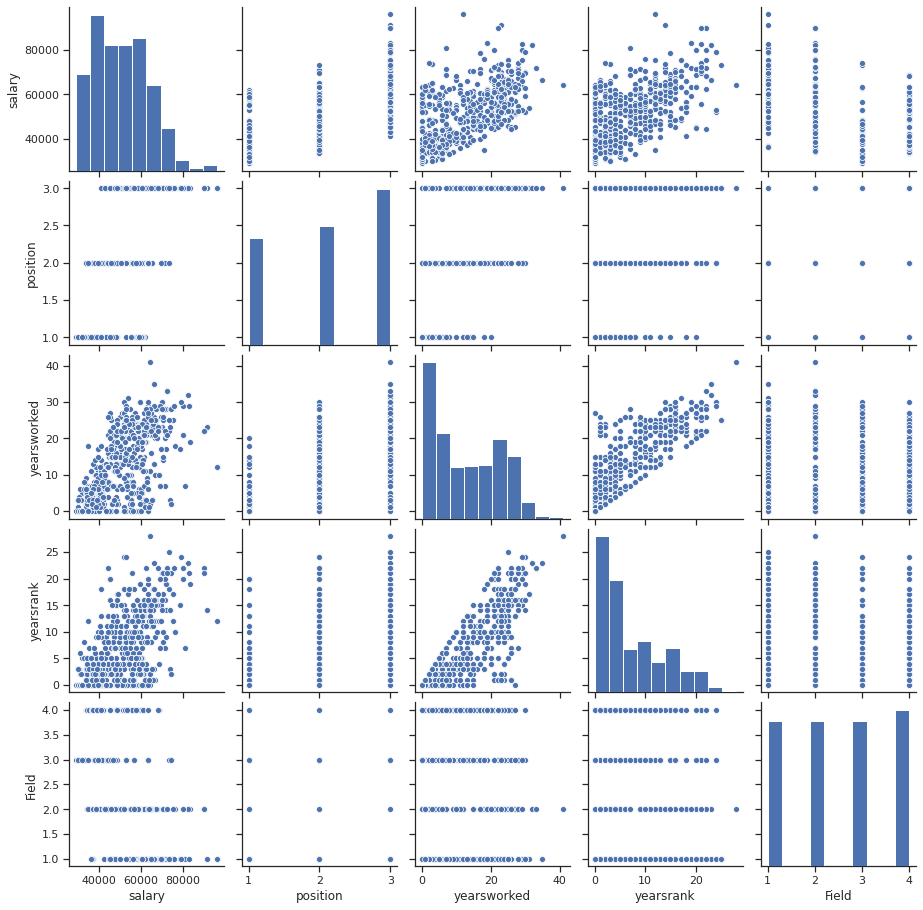

In [11]:
# Visualising data using pairplots
sns.set(style="ticks", color_codes=True)
plt.figure(figsize = (35,35))
sns.pairplot(salaries[["salary","position","yearsworked","yearsrank","Field"]]);
_=plt.show();

# 2.OneHot Encoding

In [12]:
#Reading Salary metadat csv file to see Explanation to create dictionaries
salary = pd.read_csv("Salary metadata.csv", delimiter = ";")
salary

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


In [13]:
#Creating dummies for field and renaming columns
field_df = pd.get_dummies(salaries.Field)
field_df = field_df.rename(columns={1: "Engineering", 2: "Finance",
                                3:"Human Resources", 4: "Marketing"})

field_df.head()

,Engineering,Finance,Human Resources,Marketing
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [14]:
#Creating dummies for positions and renaming columns
position_df = pd.get_dummies(salaries.position)
position_df = position_df.rename(columns={1: "Junior Employee", 2: "Manager",
                                      3:"Executive"})
position_df.head()

,Junior Employee,Manager,Executive
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [15]:
#merging original dataframe with dummies
merged_df = pd.concat([salaries, field_df,position_df], axis=1)
merged_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1,1,0,0


In [16]:
#Droping unnecessary columns
salaries_df = merged_df.drop(["exprior","market","degree","otherqual",
                               "position","male","Field","yearsabs"], axis = 1)
salaries_df.head()

,salary,yearsworked,yearsrank,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,0,1,0,1,0,0
1,58000.0,0,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,0,1,0,1,0,0
3,35782.0,2,1,0,0,0,1,1,0,0
4,34731.0,2,2,0,0,0,1,1,0,0


# 3.Correlation and statistical significance analysis 

In [18]:
pearsonr(salaries_df.yearsrank,salaries_df.salary)

(0.6107063176375227, 9.307173080331551e-54)

In [19]:
pearsonr(salaries_df.yearsworked,salaries_df.salary)

(0.6235888657598048, 1.2873351342916404e-56)

In [25]:
pearsonr(salaries.position,salaries_df.salary)

(0.7021217379212221, 2.164001495311446e-77)